In [1]:
# import labrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib
from sklearn.model_selection import train_test_split
matplotlib.rcParams['figure.figsize'] = (4, 3)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.decomposition import TruncatedSVD
import xgboost as xgb
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import warnings

In [3]:
# get data
data = yf.download('AAPL', start='2018-01-01', end='2023-12-31')
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.024185,42628800


In [4]:
# 整理数据
data['Prediction'] = data['Close'].shift(-1)
data.dropna(inplace=True)
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Prediction
Date,,,,,,,
2023-12-21,196.100006,197.080002,193.500000,194.679993,194.168518,46482500,193.600006
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.091385,37122800,193.050003
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.542831,28919300,193.149994
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.642548,48087700,193.580002
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.071426,34049900,192.529999


In [6]:
# 归一化
my_data = np.array(data)
m, n = my_data.shape
print(n)
for i in range(n):
    my_data[:, i] = (my_data[:, i] - np.mean(my_data[:, i])) / np.std(my_data[:, i])


# 划分训练集和测试集
x_train_set, x_test_set, y_train_set, y_test_set = train_test_split(my_data[:, :-1], my_data[:, -1], test_size=0.1)

7


In [8]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(x_train_set, y_train_set)
y_pred_lr = lr_model.predict(x_test_set)

rmse_lr = np.sqrt(mean_squared_error(y_test_set, y_pred_lr))

win_ratio_lr = np.mean(np.sign(y_pred_lr) == np.sign(y_test_set))

print('Linear Regression RMSE: ', rmse_lr)
print('Linear Regression Win Ratio: ', win_ratio_lr)

Linear Regression RMSE:  0.04834919126951197
Linear Regression Win Ratio:  0.9867549668874173


In [10]:
# 随机森林
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_set, y_train_set.ravel())

RandomForestRegressor(random_state=42)

In [13]:
y_rf_pred = rf_model.predict(x_test_set)

rmse_rf = np.sqrt(mean_squared_error(y_test_set, y_rf_pred))
win_ratio_rf = np.mean(np.sign(y_rf_pred) == np.sign(y_test_set))
print('Random Forest RMSE: ', rmse_rf)
print('Random Forest Win Ratio: ', win_ratio_rf)

Random Forest RMSE:  0.05481831956069309
Random Forest Win Ratio:  0.9933774834437086


In [18]:
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20], 'min_samples_split': [2, 5]}

rf_grid = GridSearchCV(rf_model, parameters, cv=3)
rf_grid.fit(x_train_set, y_train_set.ravel())

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20], 'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [23]:
y_rf_grid_pred = rf_grid.predict(x_train_set)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

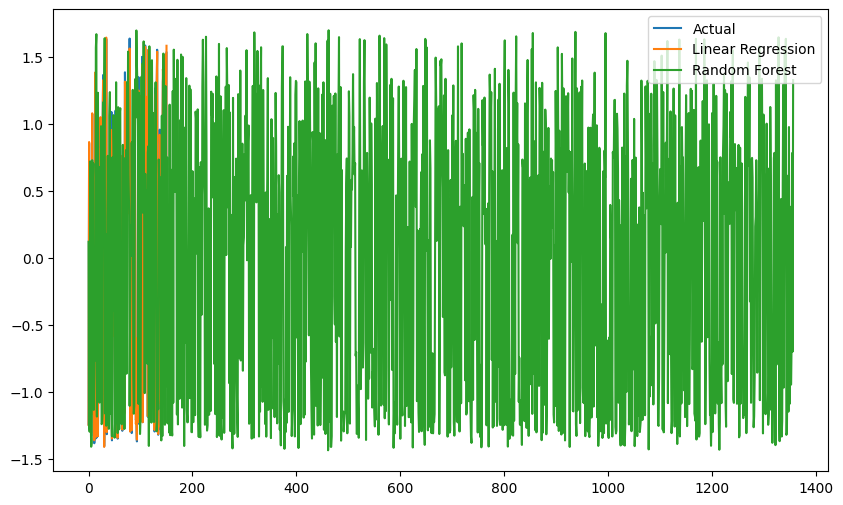

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_set, label='Actual')
plt.plot(y_pred_lr, label='Linear Regression')
plt.plot(y_rf_grid_pred, label='Random Forest')
plt.legend()
plt.show()